<a href="https://colab.research.google.com/github/Teesta-Das/TSF-GRIP-Tasks/blob/main/TSF_Task_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name-Teesta Das**
# **#2 of Task 2- Clustering:-Prediction and Visualisation:**

# **Prediction using Unsupervised Machine Learning**

### **In this task, we shall predict the optimum number of clusters for the given ‘Iris’ dataset, and represent it visually.**

In [1]:
# We import necessary python libraries for the notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# We upload the csv file and create an instance,say df, to read the dataset

In [4]:
from google.colab import files 
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [5]:
df=pd.read_csv('Iris.csv',header=0)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# We make the 'Id' column our index and modify the other columns

In [7]:
df=pd.read_csv('Iris.csv', header=0, index_col='Id')
df.columns=['Sepal Length in cm','Sepal Width in cm','Petal Length in cm','Petal Width in cm','Species']
df

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [8]:
# Now we try to get some basic information about the dataset

In [9]:
df.shape # Gives the number of rows and columns in the dataset

(150, 5)

In [10]:
df.columns # Gives all the columns of the dataset

Index(['Sepal Length in cm', 'Sepal Width in cm', 'Petal Length in cm',
       'Petal Width in cm', 'Species'],
      dtype='object')

In [11]:
df.info() # Gives information about the entire dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal Length in cm  150 non-null    float64
 1   Sepal Width in cm   150 non-null    float64
 2   Petal Length in cm  150 non-null    float64
 3   Petal Width in cm   150 non-null    float64
 4   Species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
df.describe() # Gives statistical information about the dataset

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Data Cleaning:**

In [13]:
# We check if there are any null values in the dataset
df.isnull().sum()

Sepal Length in cm    0
Sepal Width in cm     0
Petal Length in cm    0
Petal Width in cm     0
Species               0
dtype: int64

Apparently, there are no null values or missing values in the dataset.

In [14]:
# We check if there are any duplicate values in the dataset
df.duplicated().sum()

3

So we see that there are 3 duplicate values in the dataset.

In [15]:
# Now we modify the dataframe by removing all duplicate values

In [16]:
df=df.drop_duplicates()
df

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [17]:
df.shape # Gives the number of rows and columns of the modified dataframe

(147, 5)

From this point on, we shall be working with the modified dataset.

## **We shall now plot a few graphs to visualise the relationship between the various variables of the dataset:**

In [18]:
# First we find out how many unique species are there and the no of flowers belonging to each of them

In [19]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

So, there are 3 unique classes or species in the dataset.

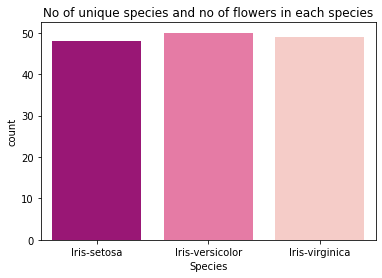

In [20]:
# We can plot these unique species on a graph
sns.countplot(x=df['Species'],palette='RdPu_r')
plt.title('No of unique species and no of flowers in each species')
plt.show()

In [21]:
# Correlation matrix: Gives the internal relations among the numerical variables of the dataset
df.corr()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
Sepal Length in cm,1.000000,-0.109321,0.871305,0.817058
Sepal Width in cm,-0.109321,1.000000,-0.421057,-0.356376
Petal Length in cm,0.871305,-0.421057,1.000000,0.961883
Petal Width in cm,0.817058,-0.356376,0.961883,1.000000


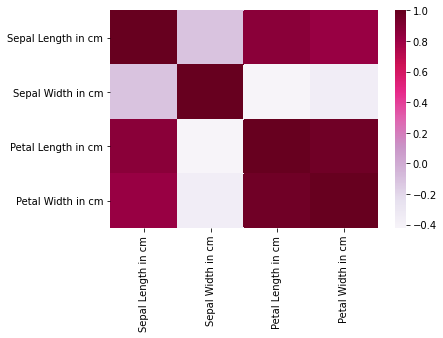

In [22]:
# We plot a heatmap to represent the correlation matrix
sns.heatmap(df.corr(),cmap='PuRd')

In [23]:
# We plot boxplots to visualise the relation between each of sepal length,sepal width,petal length and petal width of the irises with respect to the 3 species 

In [24]:
# Sepal length with respect to the three species

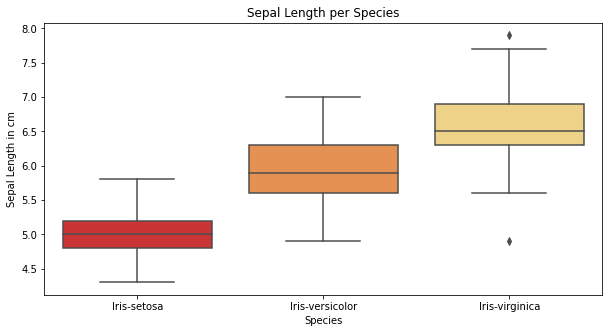

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Species'],y=df['Sepal Length in cm'],data=df,palette='YlOrRd_r')
plt.title('Sepal Length per Species')
plt.show()

In [26]:
# Sepal width with respect to the three species

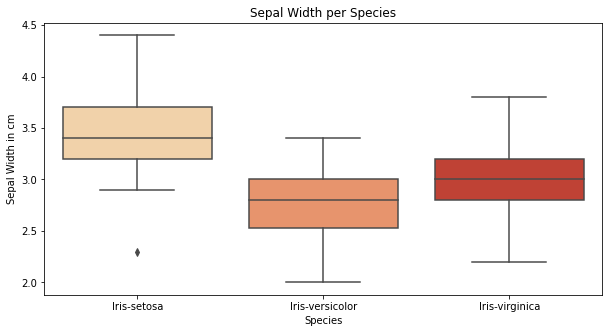

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Species'],y=df['Sepal Width in cm'],data=df,palette='OrRd')
plt.title('Sepal Width per Species')
plt.show()

In [28]:
# Petal length with respect to the three species

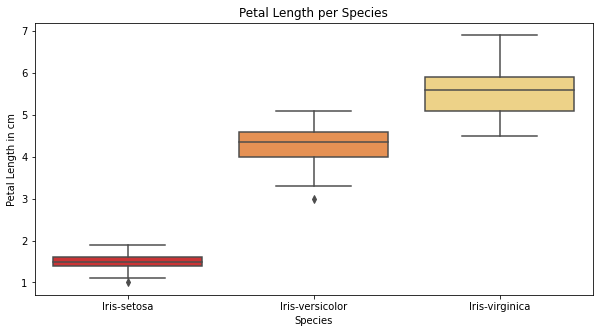

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Species'],y=df['Petal Length in cm'],data=df,palette='YlOrRd_r')
plt.title('Petal Length per Species')
plt.show()

In [30]:
# Petal width with respect to the three species

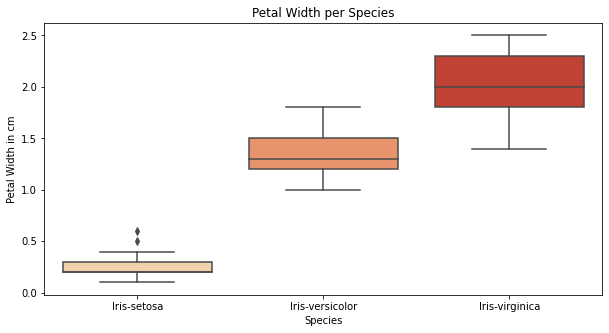

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Species'],y=df['Petal Width in cm'],data=df,palette='OrRd')
plt.title('Petal Width per Species')
plt.show()

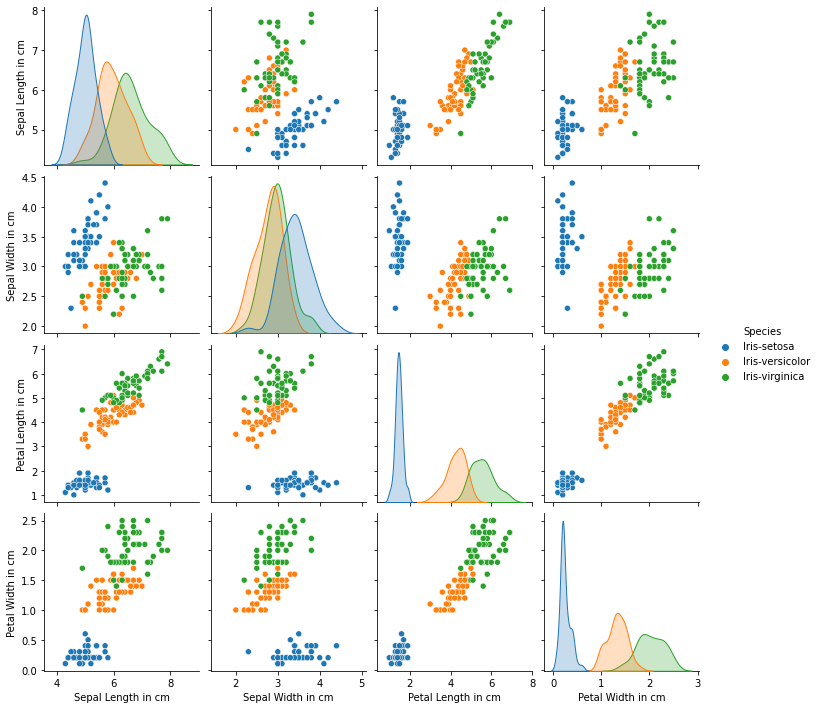

In [32]:
# We plot the pairwise relationships among the different variables of the dataset with respect to the 3 species using a pairplot 
sns.pairplot(df,hue='Species')

## **We now proceed towards clustering our data:**

**We shall cluster our data with the help of the k-means algorithm and use the Elbow Method to choose the value of k, where k is the optimum number of clusters for classification.**

In [33]:
# We first separate the features (independent variables) of the dataset

In [34]:
X=df.drop('Species',axis=1)
X

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [35]:
# We define the k-means algorithm

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [37]:
# We plot the Elbow method to find the optimum no of clusters for k-means classification and visualise it

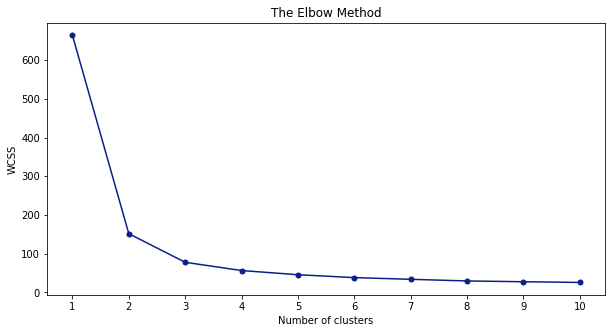

In [38]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='.', markersize=10,color='#081F87')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 10+1, 1.0))
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**As seen in the graph, the optimum clusters is where the elbow occurs i.e, it is the point after which the distortion/inertia start decreasing in a linear fashion. This is when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration.**

**Thus, in this case, we can conclude that the optimal number of clusters for the given data is 3.**

## **Now that we have the optimum number of clusters, we can move on to applying K-means clustering to the Iris dataset:**

In [39]:
# Applying k-means clustering when value of k=3

In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = kmeans.fit_predict(X)

## **Visualising the clusters:**

In [41]:
# Plotting the clusters and their centroids respectively

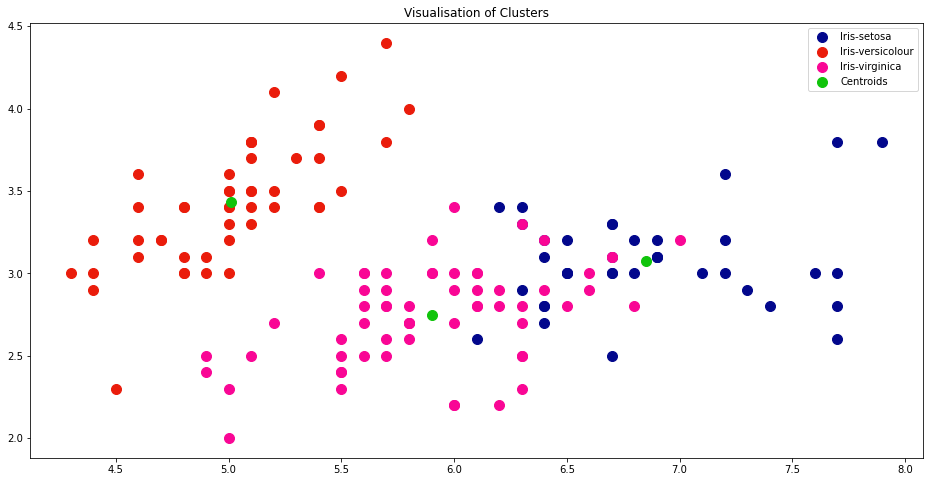

In [42]:
plt.figure(figsize=(16,8))
plt.scatter(X.values[predictions == 0, 0], X.values[predictions == 0, 1],s = 100, c = '#02078C', label = 'Iris-setosa')
plt.scatter(X.values[predictions == 1, 0], X.values[predictions== 1, 1],s = 100, c = '#EA1C0B', label = 'Iris-versicolour')
plt.scatter(X.values[predictions == 2, 0], X.values[predictions== 2, 1],s = 100, c = '#F90695', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = '#10C40B', label = 'Centroids')
plt.title('Visualisation of Clusters')
plt.legend()

### **Thus we have successfully predicted the optimum number of clusters for the given dataset with the help of Unsupervised Machine Learning and visualised the same.**